In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/turing-data-analytics-test/covid_data.csv
/kaggle/input/turing-data-analytics-test/cardio_base.csv
/kaggle/input/turing-data-analytics-test/cardio_alco.csv


In [2]:
alco_df = pd.read_csv("/kaggle/input/turing-data-analytics-test/cardio_alco.csv", sep = ";")
print(alco_df.shape)
alco_df.head()

(56903, 2)


,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [3]:
alco_df.drop_duplicates(inplace=True)
print(alco_df.shape)
print(alco_df.id.unique(), alco_df.id.nunique())
print(alco_df.alco.unique(), alco_df.alco.nunique())

(56903, 2)
[   44    45    46 ... 99951 99952 99954] 56903
[0 1] 2


In [4]:
base_df = pd.read_csv("/kaggle/input/turing-data-analytics-test/cardio_base.csv")
print(base_df.shape)
base_df.head()

(70000, 9)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [5]:
base_df.drop_duplicates(inplace=True)
print(base_df.shape)
for col in base_df.columns :
    print(col, base_df[col].unique(), base_df[col].nunique())
    print("--------------------------------------------------------")

(70000, 9)
id [    0     1     2 ... 99996 99998 99999] 70000
--------------------------------------------------------
age [18393 20228 18857 ... 14925 17727 17926] 8076
--------------------------------------------------------
gender [2 1] 2
--------------------------------------------------------
height [168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  70  97 119 130 110
 193  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64
  91  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99
  57] 109
--------------------------------------------------------
weight [ 62.    85.    64.    82.    56.    67.    93.    95.    71.    68.
  80.    60.    78.   112.    75.    52.    83.    69.    90.    45.
  65.    59.    66.    74.   105.    73.    

In [6]:
base_df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
smoke            int64
dtype: object

In [7]:
base_df['age'] = (base_df.age/365).astype('int')

In [8]:
base_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0


In [9]:
mrg_base_df = pd.merge(base_df, alco_df, on = "id", how="left")
mrg_base_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,50,2,168,62.0,110,80,1,0,NaN
1,1,55,1,156,85.0,140,90,3,0,NaN
2,2,51,1,165,64.0,130,70,3,0,NaN
3,3,48,2,169,82.0,150,100,1,0,NaN
4,4,47,1,156,56.0,100,60,1,0,NaN


In [10]:
mrg_base_df.isna().sum()

id                 0
age                0
gender             0
height             0
weight             0
ap_hi              0
ap_lo              0
cholesterol        0
smoke              0
alco           13097
dtype: int64

In [11]:
mrg_base_df.alco.fillna(method = 'bfill', inplace=True)
mrg_base_df.alco.fillna(method = 'ffill', inplace=True)

In [12]:
mrg_base_df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
alco           0
dtype: int64

In [13]:
max_avg_weight = mrg_base_df.groupby('age').weight.mean().max()
min_avg_weight = mrg_base_df.groupby('age').weight.mean().min()
(max_avg_weight / min_avg_weight) - 1 

0.2859952671226089

In [14]:
h_col_avg = mrg_base_df[mrg_base_df.age >= 50].groupby('age').cholesterol.mean().mean()
l_col_avg = mrg_base_df[mrg_base_df.age < 50].groupby('age').cholesterol.mean().mean()
h_col_avg / l_col_avg

1.192326742513159

In [15]:
print(mrg_base_df.groupby('gender').height.mean())
print(mrg_base_df.groupby('gender').weight.mean())
# Men generally are taller and heavier. So, gender 2 is men and gender 1 is women

gender
1    161.355612
2    169.947895
Name: height, dtype: float64
gender
1    72.565605
2    77.257307
Name: weight, dtype: float64


In [16]:
men_smoke = mrg_base_df[mrg_base_df.gender == 2].smoke.mean()
women_smoke = mrg_base_df[mrg_base_df.gender == 1].smoke.mean()
men_smoke/women_smoke

12.257833097333833

In [17]:
mrg_base_df.height.quantile(0.99)

184.0

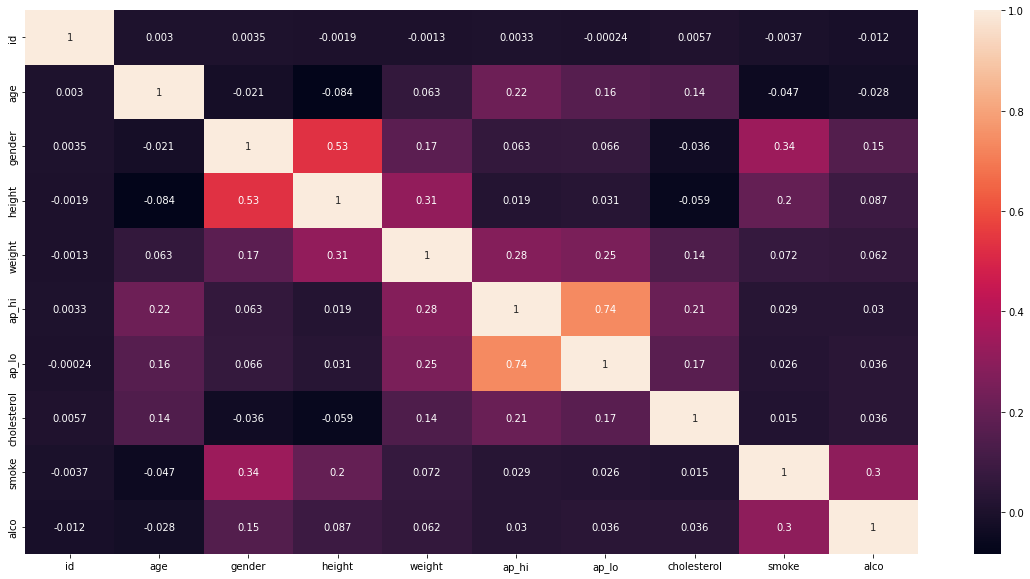

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
corr = mrg_base_df.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()

In [19]:
height_avg = mrg_base_df.height.mean()
height_std = mrg_base_df.height.std()
len(mrg_base_df[mrg_base_df.height > height_avg + 2*height_std])/len(mrg_base_df.height)

0.020557142857142857

In [20]:
mrg_base_df2 = pd.merge(base_df, alco_df, on = "id")

In [21]:
mrg_base_df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,40,1,159,60.0,110,70,1,0,0
1,45,56,1,160,73.0,130,85,1,0,0
2,46,60,2,173,82.0,140,90,3,0,0
3,47,55,1,163,55.0,120,80,1,0,0
4,49,50,2,175,95.0,120,80,1,0,0


In [22]:
smoke_old = mrg_base_df2[(mrg_base_df2.age > 50) & (mrg_base_df2.alco == 1)]
len(smoke_old)/len(mrg_base_df2[mrg_base_df2.age > 50])

0.049086076910560286

In [23]:
mrg_base_df.groupby('smoke').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,alco
smoke,,,,,,,,,
0,50005.59844,52.940906,1.299447,163.879416,73.902352,128.861431,96.326550,1.364682,0.024205
1,49629.11963,51.803534,1.868212,169.323877,77.344351,128.360512,99.774518,1.389528,0.242503


In [24]:
mrg_base_df.groupby('gender').mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
gender,,,,,,,,,
1,49898.345267,52.954338,161.355612,72.565605,128.139249,94.522776,1.384735,0.017856,0.020668
2,50110.246547,52.629179,169.947895,77.257307,130.078872,100.551982,1.333633,0.218880,0.085819


In [25]:
covid_df = pd.read_csv("/kaggle/input/turing-data-analytics-test/covid_data.csv")
print(covid_df.shape)
covid_df.head()

(23082, 8)


,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [26]:
covid_df.dtypes

location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
dtype: object

In [27]:
covid_df.drop_duplicates(inplace=True)
print(covid_df.shape)
for col in covid_df.columns :
    print(col, covid_df[col].unique(), covid_df[col].nunique())
    print("--------------------------------------------------------")

(23082, 8)
location ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenad

In [28]:
covid_df.isna().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [29]:
null_cols = ["population", "aged_65_older_percent", "gdp_per_capita", "hospital_beds_per_thousand"]
for col in null_cols :
    covid_df[col].fillna(method='ffill', inplace=True)

In [30]:
covid_df.isna().sum()

location                      0
date                          0
new_cases                     0
new_deaths                    0
population                    0
aged_65_older_percent         0
gdp_per_capita                0
hospital_beds_per_thousand    0
dtype: int64

In [31]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [32]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23082 non-null  float64       
 5   aged_65_older_percent       23082 non-null  float64       
 6   gdp_per_capita              23082 non-null  float64       
 7   hospital_beds_per_thousand  23082 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.6+ MB


In [33]:
covid_df.set_index('date')

,location,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
date,,,,,,,
2019-12-31,Afghanistan,0,0,3.892834e+07,2.581,1803.987,0.500
2020-01-01,Afghanistan,0,0,3.892834e+07,2.581,1803.987,0.500
2020-01-02,Afghanistan,0,0,3.892834e+07,2.581,1803.987,0.500
2020-01-03,Afghanistan,0,0,3.892834e+07,2.581,1803.987,0.500
2020-01-04,Afghanistan,0,0,3.892834e+07,2.581,1803.987,0.500
...,...,...,...,...,...,...,...
2020-02-28,International,0,0,7.794799e+09,8.696,15469.207,2.705
2020-02-29,International,0,2,7.794799e+09,8.696,15469.207,2.705
2020-03-01,International,0,0,7.794799e+09,8.696,15469.207,2.705


In [34]:
germany = covid_df[covid_df.location == "Germany"]
italy = covid_df[covid_df.location == "Italy"]

In [35]:
germany["cumsum"] = germany.new_cases.cumsum()
italy["cumsum"] = italy.new_cases.cumsum()
gr_it = pd.merge(germany, italy, on='date')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
gr_it[abs(gr_it.cumsum_x - gr_it.cumsum_y) > 10000]

,location_x,date,new_cases_x,new_deaths_x,population_x,aged_65_older_percent_x,gdp_per_capita_x,hospital_beds_per_thousand_x,cumsum_x,location_y,new_cases_y,new_deaths_y,population_y,aged_65_older_percent_y,gdp_per_capita_y,hospital_beds_per_thousand_y,cumsum_y
72,Germany,2020-03-12,271,1,83783945.0,21.453,45229.245,8.0,1567,Italy,2313,196,60461828.0,23.021,35220.084,3.18,12462
73,Germany,2020-03-13,802,2,83783945.0,21.453,45229.245,8.0,2369,Italy,2651,189,60461828.0,23.021,35220.084,3.18,15113
74,Germany,2020-03-14,693,0,83783945.0,21.453,45229.245,8.0,3062,Italy,2547,252,60461828.0,23.021,35220.084,3.18,17660
75,Germany,2020-03-15,733,3,83783945.0,21.453,45229.245,8.0,3795,Italy,3497,173,60461828.0,23.021,35220.084,3.18,21157
76,Germany,2020-03-16,1043,4,83783945.0,21.453,45229.245,8.0,4838,Italy,2823,370,60461828.0,23.021,35220.084,3.18,23980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678,Italy,518,85,60461828.0,23.021,35220.084,3.18,234531
159,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979,Italy,270,72,60461828.0,23.021,35220.084,3.18,234801
160,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193,Italy,197,53,60461828.0,23.021,35220.084,3.18,234998
161,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543,Italy,280,65,60461828.0,23.021,35220.084,3.18,235278


In [37]:
italy.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumsum
10688,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18,0
10689,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18,0
10690,Italy,2020-01-02,0,0,60461828.0,23.021,35220.084,3.18,0
10691,Italy,2020-01-03,0,0,60461828.0,23.021,35220.084,3.18,0
10692,Italy,2020-01-04,0,0,60461828.0,23.021,35220.084,3.18,0


<AxesSubplot:xlabel='date', ylabel='cumsum'>

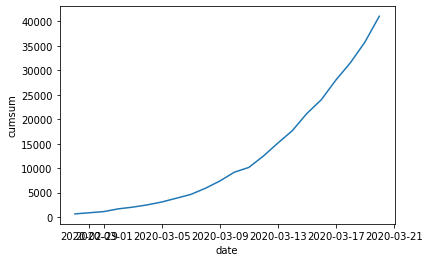

In [38]:
sns.lineplot(data=italy[(italy.date >= "2020-02-28") & (italy.date <= "2020-03-20")], x = 'date', y='cumsum')

In [39]:
italy[italy.date == "2020-03-20"]["cumsum"] - italy[italy.date == "2020-03-20"].new_cases

10768    35713
dtype: int64

In [40]:
covid_df.groupby('location').new_deaths.sum().sort_values(ascending=False)

location
World                              411195
United States                      112006
United Kingdom                      40883
Brazil                              38406
Italy                               34043
                                    ...  
Bonaire Sint Eustatius and Saba         0
Seychelles                              0
Bhutan                                  0
Saint Kitts and Nevis                   0
Dominica                                0
Name: new_deaths, Length: 212, dtype: int64

In [41]:
l_beds = covid_df[covid_df.hospital_beds_per_thousand >= 5]
h_gdp = l_beds[l_beds.gdp_per_capita > 10000]

In [42]:
len(h_gdp)/len(l_beds)

0.8350463775382301